# Title of Project: Women Cloth Reviews Prediction with Multi-Nomial Naïve Bayes

## Objective: The objective of this project is to build a prediction model for women's clothing reviews using the Multi-Nomial Naïve Bayes algorithm. The model aims to classify reviews into two categories: "Good" and "Poor" based on the ratings provided by the customers.

## Data Source: The dataset used for this project is obtained from the YBIFoundation/ProjectHub-MachineLearning Women Clothing E-Commerce Review dataset.

# Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [8]:
df = pd.read_csv("E:\INTERSHIP\YBI FOUNDATION\Women Clothing E-Commerce Review.csv")

In [9]:
df.head(10)

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [10]:
df.tail(10)

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim
23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [12]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [13]:
df.shape


(23486, 10)

In [14]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


# Missing Values
Remove Missing Values in Reviews Columns with no Review Text

In [16]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [17]:
df[df['Review']==""] = np.NaN
df['Review'].fillna("No review is given", inplace=True)
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [18]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object

# Define Target (y) and Feauture(x)

In [20]:
x = df['Review']
y = df['Rating']
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

# Train Text Split

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

# Get Feature Text Conversion to Token

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=50000)
x_train = cv.fit_transform(x_train)
cv.get_feature_names_out()

array(['00 big', '00 fits', '00 petite', ..., 'zipper zip',
       'zippered pockets', 'zippers buttons'], dtype=object)

In [25]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
x_test = cv.fit_transform(x_test)
cv.get_feature_names_out()

array(['00 24', '00 petite', '00 sold', ..., 'zipper split',
       'zipper sturdy', 'zippers buttons'], dtype=object)

In [27]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Get Model Train

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

# Get Model Prediction

In [31]:
y_pred = model.predict(x_test)
y_pred.shape

(7046,)

In [32]:
y_pred

array([1, 2, 5, ..., 4, 3, 1], dtype=int64)

# Get Probability of Each Predicted Class

In [34]:
model.predict_proba(x_test)

array([[0.45433767, 0.08215679, 0.44111678, 0.00904855, 0.01334022],
       [0.08538546, 0.53197259, 0.36096501, 0.00370374, 0.01797319],
       [0.04978519, 0.07954803, 0.11784385, 0.31199241, 0.44083052],
       ...,
       [0.07871327, 0.0343138 , 0.02156397, 0.8608945 , 0.00451447],
       [0.09545745, 0.00239741, 0.84956399, 0.01241549, 0.04016567],
       [0.65456291, 0.01868614, 0.14266667, 0.04591333, 0.13817096]])

# Get Model Evaluation 

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[  65   41   46   37   64]
 [ 158   75   57   80  100]
 [ 280  176  138  115  152]
 [ 539  297  217  201  269]
 [1237  777  619  533  773]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.03      0.26      0.05       253
           2       0.05      0.16      0.08       470
           3       0.13      0.16      0.14       861
           4       0.21      0.13      0.16      1523
           5       0.57      0.20      0.29      3939

    accuracy                           0.18      7046
   macro avg       0.20      0.18      0.15      7046
weighted avg       0.38      0.18      0.22      7046



# Recategorizing ratings as Poor (0) and Good (1)

In [39]:
df["Rating"].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

# Re-Rating as 1,2,3 as 0 and 4,5 as 1

In [41]:
df.replace({'Rating': { 1:0, 2:0, 3:0, 4:1, 5:1 }}, inplace=True)
y = df['Rating']
x = df['Review']

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

# Get Feature Text Conversion to Token

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=50000)
x_train = cv.fit_transform(x_train)
x_test = cv.fit_transform(x_test)

# Get Model Re-Train

In [47]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

# Get Model Prediction

In [49]:
y_pred = model.predict(x_test)
y_pred.shape

(7046,)

In [50]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# Get Model Evaluation

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

[[ 712  871]
 [2643 2820]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.45      0.29      1583
           1       0.76      0.52      0.62      5463

    accuracy                           0.50      7046
   macro avg       0.49      0.48      0.45      7046
weighted avg       0.64      0.50      0.54      7046



# Data Visualisation

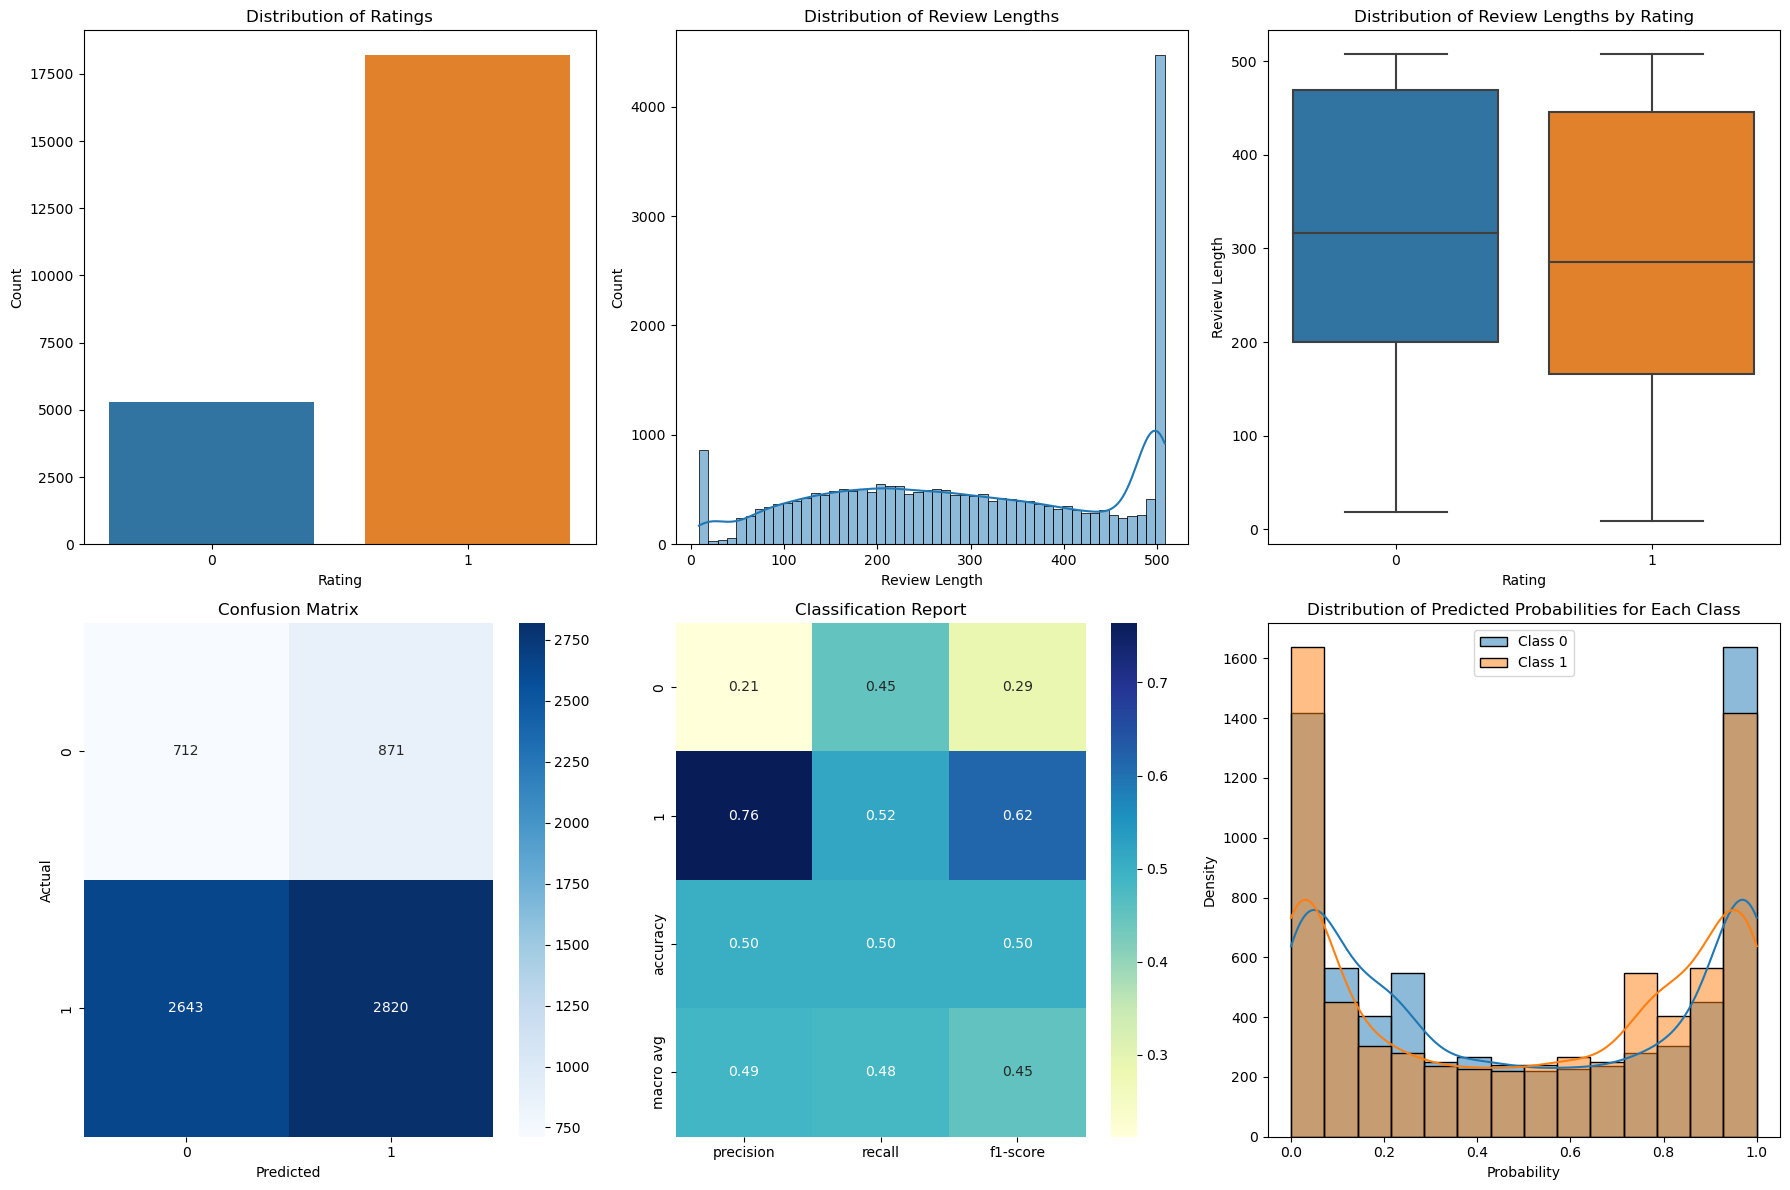

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate review lengths
review_lengths = df['Review'].apply(len)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of ratings
sns.countplot(x='Rating', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Ratings')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Count')

# 2. Distribution of review lengths
sns.histplot(review_lengths, bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Review Lengths')
axs[0, 1].set_xlabel('Review Length')
axs[0, 1].set_ylabel('Count')

# 3. Distribution of review lengths by rating
sns.boxplot(x='Rating', y=review_lengths, data=df, ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Review Lengths by Rating')
axs[0, 2].set_xlabel('Rating')
axs[0, 2].set_ylabel('Review Length')

# 4. Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')

# 5. Classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', ax=axs[1, 1])
axs[1, 1].set_title('Classification Report')

# 6. Distribution of predicted probabilities for each class
y_pred_proba = model.predict_proba(x_test)
for i in range(y_pred_proba.shape[1]):
    sns.histplot(y_pred_proba[:, i], kde=True, label=f'Class {i}', alpha=0.5, ax=axs[1, 2])
axs[1, 2].set_title('Distribution of Predicted Probabilities for Each Class')
axs[1, 2].set_xlabel('Probability')
axs[1, 2].set_ylabel('Density')
axs[1, 2].legend()

plt.tight_layout()
plt.show()